In [15]:
from __future__ import division #always returns approximations from divisions
import numpy as np
import matplotlib.pyplot as plt
import ephem #for astronomy calculations, converting coordinate systems
import pandas as pd
from astroquery.gaia import Gaia
import math

In [16]:
v_df = pd.read_csv('voy2_ephemeris.csv') #voyager 2 ephemeris 
s_df = pd.DataFrame(columns = ['source_id', 'ra', 'dec', 'g_abs', 'bp_rp', 'parallax', 'parallax_error', 'dist', 'date', 'pmra', 'pmdec', 'adv_ra', 'adv_dec', 'eph_pt']) #empty dataframe for encountered stars

In [17]:
print(v_df)

      Unnamed: 0                      date         ra       dec
0              0  1977-Aug-21 00:00:00.000   69.59450  41.46983
1              1  1977-Aug-21 00:39:06.003   69.75263  41.45946
2              2  1977-Aug-21 01:24:15.304   69.91004  41.44891
3              3  1977-Aug-21 02:16:52.734   70.06644  41.43820
4              4  1977-Aug-21 03:18:55.479   70.22172  41.42733
...          ...                       ...        ...       ...
3899           0  2030-Aug-21 00:00:00.000  303.61388 -60.48901
3900           1  2030-Sep-14 14:12:36.920  303.39226 -60.45649
3901           2  2030-Oct-15 10:58:33.566  303.25746 -60.36818
3902           3  2030-Nov-20 17:45:19.809  303.35130 -60.23340
3903           4  2030-Dec-17 03:44:51.641  303.57749 -60.14532

[3904 rows x 4 columns]


In [18]:
v_df['year'] = 0
v_df['month'] = 0
v_df['day'] = 0
v_df['hour'] = 0
v_df['min'] = 0
v_df['sec'] = 0
v_df['total_time'] = 0
v_df['time_lasts'] = 0

for i in range(len(v_df.index)):
    v_df['year'][i] = float(v_df['date'][i][:4])
    v_df['month'][i] = v_df['date'][i][5:8]
    v_df['day'][i] = float(v_df['date'][i][9:11])
    v_df['hour'][i] = float(v_df['date'][i][12:14])
    v_df['min'][i] = float(v_df['date'][i][15:17])
    v_df['sec'][i] = v_df['date'][i][18:]
    
    if v_df['month'][i] == "Jan":
        v_df['month'][i] = 0
        
    elif v_df['month'][i] == "Feb":
        v_df['month'][i] = 1
        
    elif v_df['month'][i] == "Mar":
        v_df['month'][i] = 2
        
    elif v_df['month'][i] == "Apr":
        v_df['month'][i] = 3
        
    elif v_df['month'][i] == "May":
        v_df['month'][i] = 4
        
    elif v_df['month'][i] == "Jun":
        v_df['month'][i] = 5
        
    elif v_df['month'][i] == "Jul":
        v_df['month'][i] = 6
        
    elif v_df['month'][i] == "Aug":
        v_df['month'][i] = 7
        
    elif v_df['month'][i] == "Sep":
        v_df['month'][i] = 8
        
    elif v_df['month'][i] == "Oct":
        v_df['month'][i] = 9
        
    elif v_df['month'][i] == "Nov":
        v_df['month'][i] = 10
        
    elif v_df['month'][i] == "Dec":
        v_df['month'][i] = 11
    
    #calc total time (since 0/0/0) in seconds
    v_df['total_time'][i] = v_df['year'][i] * 31536000 + v_df['month'][i] * 2628288 + v_df['day'][i] * 86400 + v_df['hour'][i] * 3600 + v_df['min'][i] * 60 + float(v_df['sec'][i])
    
for i in range(len(v_df.index)-1):    
    v_df['time_lasts'][i] = v_df['total_time'][i+1] - v_df['total_time'][i]
    
print(v_df)

<ipython-input-18-bdaabe8958ac>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v_df['year'][i] = float(v_df['date'][i][:4])
<ipython-input-18-bdaabe8958ac>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v_df['month'][i] = v_df['date'][i][5:8]
/Users/mikeyd1050/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-inp

      Unnamed: 0                      date         ra       dec  year month  \
0              0  1977-Aug-21 00:00:00.000   69.59450  41.46983  1977     7   
1              1  1977-Aug-21 00:39:06.003   69.75263  41.45946  1977     7   
2              2  1977-Aug-21 01:24:15.304   69.91004  41.44891  1977     7   
3              3  1977-Aug-21 02:16:52.734   70.06644  41.43820  1977     7   
4              4  1977-Aug-21 03:18:55.479   70.22172  41.42733  1977     7   
...          ...                       ...        ...       ...   ...   ...   
3899           0  2030-Aug-21 00:00:00.000  303.61388 -60.48901  2030     7   
3900           1  2030-Sep-14 14:12:36.920  303.39226 -60.45649  2030     8   
3901           2  2030-Oct-15 10:58:33.566  303.25746 -60.36818  2030     9   
3902           3  2030-Nov-20 17:45:19.809  303.35130 -60.23340  2030    10   
3903           4  2030-Dec-17 03:44:51.641  303.57749 -60.14532  2030    11   

      day  hour  min     sec   total_time  time_las

In [5]:
#Cone search using max radius on first position in ephemeris
for i in range(len(v_df.index)):
    query = """SELECT source_id, ra, dec, phot_g_mean_mag+5*log10(parallax/1000)+5 AS g_abs, (phot_bp_mean_mag - phot_rp_mean_mag) AS bp_rp, parallax, parallax_error, 1000/parallax AS dist, pmra, pmdec
    FROM external.gaiaedr3_gcns_main_1
    WHERE 1=CONTAINS(
    POINT('ICRS', ra, dec),
    CIRCLE('ICRS', """ + str(v_df['ra'][i]) + """,""" + str(v_df['dec'][i]) + """, 0.4527778))
    AND parallax > 0
    """

    results = Gaia.launch_job_async(query).get_results() #results from gaia query
    results = results.to_pandas().dropna() #convert to pandas

    results['date'] = v_df['date'][i]
    results['eph_pt'] = i; #stores which row in ephemeris from

    s_df = pd.concat([s_df, results], ignore_index = True)

print(s_df)

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


In [6]:
#Advance stars in list with motion
s_df['adv_ra'] = s_df['ra'] + 3.26*s_df['dist']*s_df['pmra']/1000*(0.000277778)
s_df['adv_dec'] = s_df['dec'] + 3.26*s_df['dist']*s_df['pmdec']/1000*(0.000277778)

print(s_df)

                 source_id          ra        dec      g_abs     bp_rp  \
0       204001914247731328   69.432001  41.610680   5.087796  0.922390   
1       203931163247581184   69.664088  41.158500  11.165405 -0.197276   
2       203968344783266048   69.892389  41.547505  12.308809  3.068531   
3       204001914247731328   69.432001  41.610680   5.087796  0.922390   
4       203931163247581184   69.664088  41.158500  11.165405 -0.197276   
...                    ...         ...        ...        ...       ...   
19879  6443362752673998336  302.876215 -60.104970  10.173745  2.365123   
19880  6443292998108675712  303.374128 -60.428701  14.017079  0.677868   
19881  6443379623305531264  303.048162 -59.834271   5.712874  1.019660   
19882  6443365570172526848  303.135478 -59.953872  14.552125  0.913990   
19883  6443408687349056128  303.599526 -60.037913  14.333668  4.070856   

        parallax  parallax_error       dist                      date  \
0      24.450842        0.022012  40.8

In [7]:
#Check that advanced ra and dec are within actual cone

final_stars = pd.DataFrame(columns = ['source_id', 'ra', 'dec', 'g_abs', 'bp_rp', 'parallax', 'parallax_error', 'dist', 'date', 'pmra', 'pmdec', 'adv_ra', 'adv_dec', 'eph_pt'])

for i in range(len(s_df.index)):
    dist = math.sqrt((v_df['ra'][s_df['eph_pt'][i]] - s_df['adv_ra'][i])**2 + (v_df['dec'][s_df['eph_pt'][i]] - s_df['adv_dec'][i])**2) #calculate distance between advanced position and center of beam
    
    if dist < 0.064: #if distance < radius of beam add to final version
        final_stars = final_stars.append(s_df.loc[s_df['source_id'] == s_df['source_id'][i]]) #add star to final version     

In [33]:
final_stars = pd.read_csv('voy2_stars_final_dup.csv') #final stars from above were saved in this file

final_stars['time_total'] = 0
final_stars = final_stars[final_stars['dist'] <= 100] #eliminate stars not in 100 pc

final_stars['num'] = 0 

for i in range(len(final_stars.index)):
    final_stars['num'][i] = i  #index of stars
    final_stars['time_total'][i] = v_df['time_lasts'][final_stars['eph_pt'][i]] #time for each search based on ephemeris pt time lasts
    
final_stars = final_stars.drop(['Unnamed: 0'], axis = 1) #drop extra column
    
final_stars.to_csv('voy2_stars_final_dup.csv') #save again 
print(final_stars) #all stars with duplicates

final_stars_unique = pd.DataFrame(columns = ['source_id', 'ra', 'dec', 'g_abs', 'bp_rp', 'parallax', 'parallax_error', 'dist', 'date', 'pmra', 'pmdec', 'adv_ra', 'adv_dec', 'eph_pt', 'time_total'])

<ipython-input-33-59600fcfef28>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_stars['num'][i] = i  #index of stars
<ipython-input-33-59600fcfef28>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_stars['time_total'][i] = v_df['time_lasts'][final_stars['eph_pt'][i]] #time for each search based on ephemeris pt time lasts


                source_id          ra        dec      g_abs     bp_rp  \
0      203337117732228096   71.727281  41.231695  14.699871  0.983583   
1      203337117732228096   71.727281  41.231695  14.699871  0.983583   
2      203337117732228096   71.727281  41.231695  14.699871  0.983583   
3      203337117732228096   71.727281  41.231695  14.699871  0.983583   
4      203337117732228096   71.727281  41.231695  14.699871  0.983583   
...                   ...         ...        ...        ...       ...   
3583  6443292998108675712  303.374128 -60.428701  14.017079  0.677868   
3584  6443292998108675712  303.374128 -60.428701  14.017079  0.677868   
3585  6443292998108675712  303.374128 -60.428701  14.017079  0.677868   
3586  6443292998108675712  303.374128 -60.428701  14.017079  0.677868   
3587  6443292998108675712  303.374128 -60.428701  14.017079  0.677868   

       parallax  parallax_error       dist                      date  \
0     10.719297        0.489020  93.289696  1977-Au

In [34]:
num_hit = np.array([])     #number of times a star appears in search, index matches
total_times = np.array([])     #array of total times for each star, index matches

for i in range(len(final_stars.index)):
    if (final_stars['source_id'][i] not in final_stars_unique[['source_id']].to_numpy()):   #if star not in unique database
        final_stars_unique = final_stars_unique.append(final_stars.loc[final_stars['num'] == i]) #add star to unique df
        
        num_hit = np.append(num_hit, 1)  #add 1 hit
        
        total_time = final_stars['time_total'][i]   #add value to total time
        
        for j in range(i+1, len(final_stars.index)):   #search from next star in final_stars to end
            
            if final_stars['source_id'][j] == final_stars['source_id'][i]:    #if same star appears again add time and increase number of hits by 1
                total_time += final_stars['time_total'][j]
                num_hit[-1] += 1
                
        total_times = np.append(total_times, total_time)    #add total time to total times array

final_stars_unique['time_total'] = total_times.tolist()    #add total times and num hit as columns
final_stars_unique['num_hit'] = num_hit.tolist()
print(final_stars_unique)  #dataframe of stars without duplicates and with total times & num hits

                source_id          ra        dec      g_abs     bp_rp  \
0      203337117732228096   71.727281  41.231695  14.699871  0.983583   
14     227608665117141120   65.793643  39.949084   8.468499  2.060289   
21     226133159169836544   62.715122  38.892738   7.059001  1.429630   
28     226465589637712256   60.921404  38.194141   7.072890  1.541753   
35     220457029177927552   58.753717  37.228302   9.889361  2.449903   
...                   ...         ...        ...        ...       ...   
3429  6444132028560314624  302.363428 -59.702667   5.533444  0.960252   
3460  6443419480601801984  304.005510 -59.708960  11.311670  2.851825   
3499  6443471192008240128  303.877111 -59.551804  12.457338  3.190645   
3535  6443362752673998336  302.876215 -60.104970  10.173745  2.365123   
3566  6443292998108675712  303.374128 -60.428701  14.017079  0.677868   

       parallax  parallax_error       dist                      date  \
0     10.719297        0.489020  93.289696  1977-Au

In [35]:
final_stars_unique.to_csv('voy2_results_error.csv') #save again 
print(final_stars_unique)

                source_id          ra        dec      g_abs     bp_rp  \
0      203337117732228096   71.727281  41.231695  14.699871  0.983583   
14     227608665117141120   65.793643  39.949084   8.468499  2.060289   
21     226133159169836544   62.715122  38.892738   7.059001  1.429630   
28     226465589637712256   60.921404  38.194141   7.072890  1.541753   
35     220457029177927552   58.753717  37.228302   9.889361  2.449903   
...                   ...         ...        ...        ...       ...   
3429  6444132028560314624  302.363428 -59.702667   5.533444  0.960252   
3460  6443419480601801984  304.005510 -59.708960  11.311670  2.851825   
3499  6443471192008240128  303.877111 -59.551804  12.457338  3.190645   
3535  6443362752673998336  302.876215 -60.104970  10.173745  2.365123   
3566  6443292998108675712  303.374128 -60.428701  14.017079  0.677868   

       parallax  parallax_error       dist                      date  \
0     10.719297        0.489020  93.289696  1977-Au

In [36]:
print(final_stars.drop_duplicates(subset=['source_id'])) #checking that unique search works, same number

                source_id          ra        dec      g_abs     bp_rp  \
0      203337117732228096   71.727281  41.231695  14.699871  0.983583   
14     227608665117141120   65.793643  39.949084   8.468499  2.060289   
21     226133159169836544   62.715122  38.892738   7.059001  1.429630   
28     226465589637712256   60.921404  38.194141   7.072890  1.541753   
35     220457029177927552   58.753717  37.228302   9.889361  2.449903   
...                   ...         ...        ...        ...       ...   
3429  6444132028560314624  302.363428 -59.702667   5.533444  0.960252   
3460  6443419480601801984  304.005510 -59.708960  11.311670  2.851825   
3499  6443471192008240128  303.877111 -59.551804  12.457338  3.190645   
3535  6443362752673998336  302.876215 -60.104970  10.173745  2.365123   
3566  6443292998108675712  303.374128 -60.428701  14.017079  0.677868   

       parallax  parallax_error       dist                      date  \
0     10.719297        0.489020  93.289696  1977-Au

In [37]:
final_stars_unique = final_stars_unique[final_stars_unique['parallax_error'] <= 0.34]
print(final_stars_unique) #final stars accounting for parallax error

final_stars_unique.to_csv('voy2_results.csv') #save again 

                source_id          ra        dec      g_abs     bp_rp  \
14     227608665117141120   65.793643  39.949084   8.468499  2.060289   
21     226133159169836544   62.715122  38.892738   7.059001  1.429630   
28     226465589637712256   60.921404  38.194141   7.072890  1.541753   
42     220457029171453568   58.754290  37.229365   9.551623  2.383909   
49     124733344995363968   51.559546  32.573715  10.921232  2.856726   
...                   ...         ...        ...        ...       ...   
3429  6444132028560314624  302.363428 -59.702667   5.533444  0.960252   
3460  6443419480601801984  304.005510 -59.708960  11.311670  2.851825   
3499  6443471192008240128  303.877111 -59.551804  12.457338  3.190645   
3535  6443362752673998336  302.876215 -60.104970  10.173745  2.365123   
3566  6443292998108675712  303.374128 -60.428701  14.017079  0.677868   

       parallax  parallax_error       dist                      date  \
14    11.284186        0.016740  88.619593  1977-Oc

In [38]:
s_df_og = pd.read_csv('voy2_stars.csv') #original star search

print(s_df_og)

     Unnamed: 0  Unnamed: 0.1            source_id          ra        dec  \
0             2             2   203828633790026496   69.115828  40.785963   
1             3             3   227586507384166912   65.553618  39.852598   
2             4             4   226133159169836544   62.715122  38.892738   
3             5             5   226465589637712256   60.921404  38.194141   
4             7             7   220457029171453568   58.754290  37.229365   
..          ...           ...                  ...         ...        ...   
320         355           413  6443419480601801984  304.005510 -59.708960   
321         356           414  6443365570172526848  303.135478 -59.953872   
322         357           415  6443471192008240128  303.877111 -59.551804   
323         358           417  6443362752673998336  302.876215 -60.104970   
324         359           420  6443292998108675712  303.374128 -60.428701   

         g_abs     bp_rp   parallax  parallax_error       dist  \
0    12.2

In [39]:
s_df_missing = np.array([]) #stars missing from new search
s_df_added = np.array([])  #stars added by new search

og_source = s_df_og['source_id'].to_numpy()    #source ids of og search without error
new_source = final_stars_unique['source_id'].to_numpy()    #source ids of new search without error

print('Missing stars\n')

for i in range(len(og_source)):    #add stars in og but not new search to missing stars array
    if (og_source[i] not in new_source):
        s_df_missing = np.append(s_df_missing, og_source[i])
        
print(s_df_missing)        
print('\nTotal missing: ' + str(s_df_missing.size) + '\n')   #total number missing

print('Added stars\n')

for i in range(len(new_source)):     #add stars in new but not og to added stars array
    if (new_source[i] not in og_source):
        s_df_added = np.append(s_df_added, new_source[i])
        
print(s_df_added)        
print('\nTotal added: ' + str(s_df_added.size) + '\n')    #total number added

Missing stars

[2.03828634e+17 2.27586507e+17 2.21410409e+17 1.19153113e+17
 6.71790996e+16 1.62352036e+17 1.50671821e+17 3.42032040e+18
 3.42088651e+18 3.41816237e+18 8.70742982e+17 6.75284484e+17
 6.36175233e+17 3.86672868e+18 3.69853488e+18 3.67794126e+18
 3.61430366e+18 6.30439483e+18 6.31040520e+18 6.31040520e+18
 6.30732853e+18 6.24409242e+18 4.12659383e+18 4.11428651e+18
 4.11165785e+18 4.11165785e+18 6.76047352e+18 6.71485735e+18
 6.71322826e+18 6.66393038e+18 6.66056182e+18 6.66040009e+18
 6.64708133e+18 6.64682208e+18 6.64680529e+18 6.64679364e+18
 6.64584301e+18 6.64591908e+18 6.64595629e+18 6.64595629e+18
 6.64563568e+18 6.64564461e+18 6.64570206e+18 6.64276581e+18
 6.64256422e+18 6.64146908e+18 6.64125292e+18 6.64120644e+18
 6.64120644e+18 6.64123897e+18 6.64127618e+18 6.64127543e+18
 6.44912574e+18 6.44898803e+18 6.44898541e+18 6.44794535e+18
 6.44771847e+18 6.44771826e+18 6.44770414e+18 6.44459981e+18
 6.44459496e+18 6.44453937e+18 6.44453081e+18 6.44420824e+18
 6.443365

In [40]:
voy2_stars = pd.read_csv('voy2_results.csv') #get csv
print(voy2_stars)

     Unnamed: 0            source_id          ra        dec      g_abs  \
0            14   227608665117141120   65.793643  39.949084   8.468499   
1            21   226133159169836544   62.715122  38.892738   7.059001   
2            28   226465589637712256   60.921404  38.194141   7.072890   
3            42   220457029171453568   58.754290  37.229365   9.551623   
4            49   124733344995363968   51.559546  32.573715  10.921232   
..          ...                  ...         ...        ...        ...   
267        3429  6444132028560314624  302.363428 -59.702667   5.533444   
268        3460  6443419480601801984  304.005510 -59.708960  11.311670   
269        3499  6443471192008240128  303.877111 -59.551804  12.457338   
270        3535  6443362752673998336  302.876215 -60.104970  10.173745   
271        3566  6443292998108675712  303.374128 -60.428701  14.017079   

        bp_rp   parallax  parallax_error       dist                      date  \
0    2.060289  11.284186      

<ipython-input-41-c55692bf7529>:9: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("hot"))
  color_map.set_bad(color='white') #set color as white for masked values


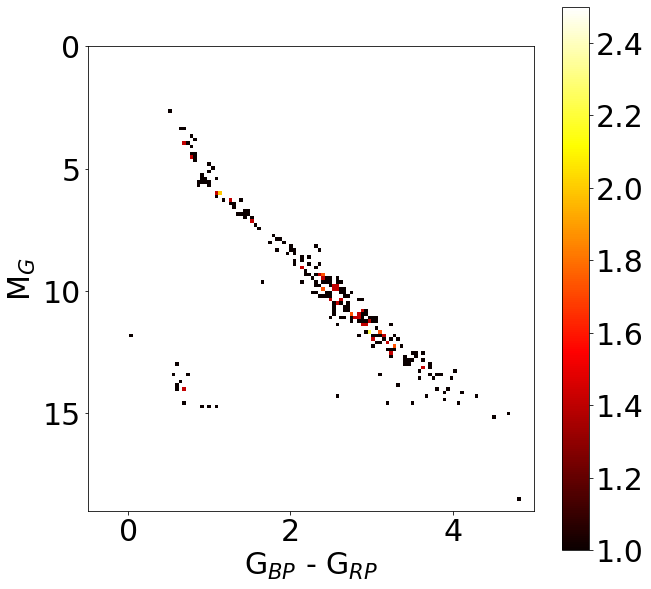

In [41]:
#build hr diagram
histogram, xedges, yedges = np.histogram2d(
   voy2_stars['bp_rp'], voy2_stars['g_abs'], bins=110)

histogram = np.ma.masked_where(histogram == 0.0, histogram) #map zero values
histogram = histogram.T #list bins with common y range

color_map = plt.cm.get_cmap("hot") #set colors for diagram
color_map.set_bad(color='white') #set color as white for masked values

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]] #bounding box in data

#plotting

plt.figure(figsize=(10, 10))

plt.imshow(np.sqrt(histogram), origin='lower', cmap=color_map,
    extent=extent, aspect=(extent[1]-extent[0])/(extent[3]-extent[2])
    )

plt.xlim(-0.5, 5)
plt.ylim(0, 19)

plt.colorbar()
plt.clim(1,2.5)

plt.xlabel('G$_{BP}$ - G$_{RP}$')
plt.ylabel('M$_G$')
plt.gca().invert_yaxis()
plt.savefig('voy2_stars_hr.png')

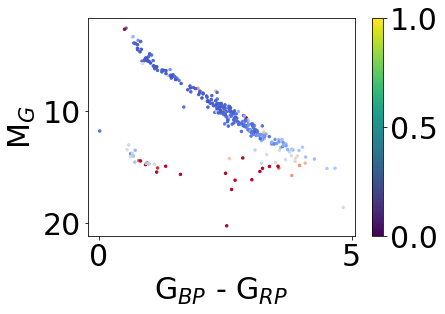

In [42]:
#color magnitude with stars removed from parallax error
cmap = plt.cm.get_cmap("coolwarm")
voy2_stars = pd.read_csv('voy2_results_error.csv')   #color magnitude including error stars

plt.scatter(voy2_stars['bp_rp'], voy2_stars['g_abs'], color = cmap(voy2_stars['parallax_error']*2), s = 6)

plt.colorbar()
plt.gca().invert_yaxis()

plt.xlabel('G$_{BP}$ - G$_{RP}$')
plt.ylabel('M$_G$')

plt.savefig("voy2_stars_error.png")

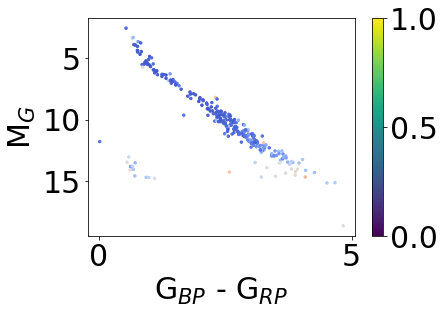

In [43]:
#color magnitude without stars removed from parallax error
voy2_stars = voy2_stars[voy2_stars['parallax_error'] <= 0.34]       #With error filter of .34

cmap = plt.cm.get_cmap("coolwarm")

plt.scatter(voy2_stars['bp_rp'], voy2_stars['g_abs'], color = cmap(voy2_stars['parallax_error']*2), s = 6)

plt.colorbar()
plt.gca().invert_yaxis()

plt.xlabel('G$_{BP}$ - G$_{RP}$')
plt.ylabel('M$_G$')

plt.savefig("voy2_stars_error_removed.png")

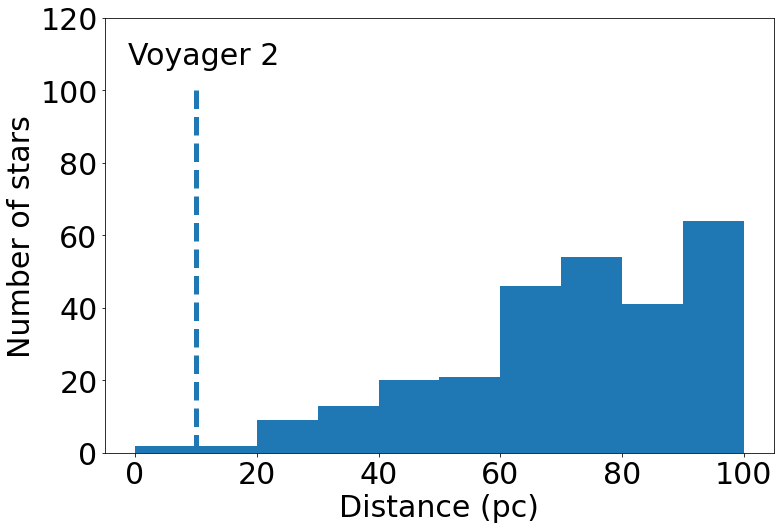

In [44]:
voy2_stars = pd.read_csv('voy2_results.csv') #distance histogram

plt.rcParams.update({'font.size': 30})
plt.figure(figsize=(12, 8))

plt.hist(abs(1000/voy2_stars['parallax']), bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]) #plot parallax (mas) converted to distance (pc) in histogram
plt.plot([10, 10], [0, 100], '--', linewidth=5, c='#1f77b4')

plt.xlabel("Distance (pc)")
plt.ylabel("Number of stars")
plt.figtext(0.24, 0.8, "Voyager 2", wrap=True, horizontalalignment='center')

plt.ylim(0, 120)

plt.savefig("voy2_stars_dist.png")
plt.show()

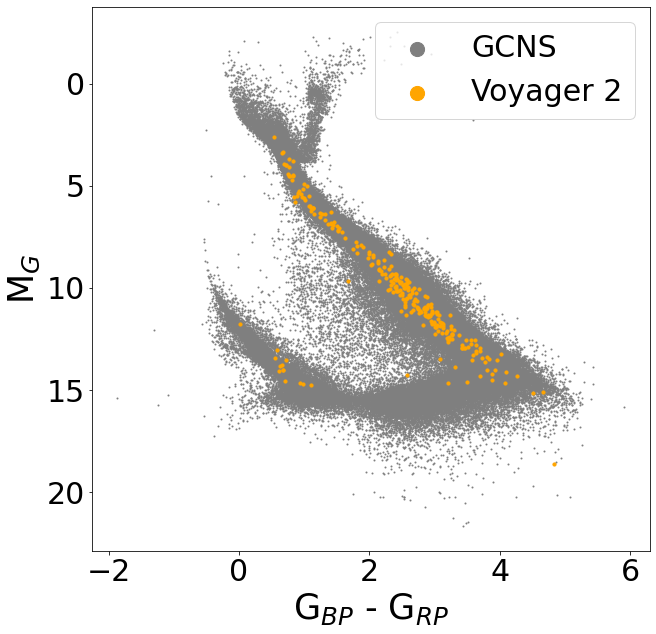

In [45]:
gcns = pd.read_csv('gcns_total.csv') #all stars in the GCNS database

plt.figure(figsize=(10, 10))

plt.scatter(gcns['bp_rp'], gcns['g_abs'], c = 'tab:gray', s = 1, label = "GCNS")
plt.scatter(voy2_stars['bp_rp'], voy2_stars['g_abs'], c = 'orange', s = 10, label = "Voyager 2")

plt.gca().invert_yaxis()
plt.xlabel('G$_{BP}$ - G$_{RP}$', fontsize=35)
plt.ylabel('M$_G$', fontsize=35)

lgnd = plt.legend(loc='upper right')
lgnd.legendHandles[0]._sizes = [200]
lgnd.legendHandles[1]._sizes = [200]

plt.savefig("voy2_superset_hr.png")
plt.show()

In [46]:
star_results = pd.read_csv('voy2_results.csv')
star_results_error = pd.read_csv('voy2_results_error.csv')

star_results['time_total'] = star_results['time_total']/86400 #convert total time from seconds to hours
star_results_error['time_total'] =  star_results_error['time_total']/86400

print(star_results)
print(star_results_error)

star_results.to_csv('voy2_results.csv')
star_results_error.to_csv('voy2_results_error.csv')

     Unnamed: 0            source_id          ra        dec      g_abs  \
0            14   227608665117141120   65.793643  39.949084   8.468499   
1            21   226133159169836544   62.715122  38.892738   7.059001   
2            28   226465589637712256   60.921404  38.194141   7.072890   
3            42   220457029171453568   58.754290  37.229365   9.551623   
4            49   124733344995363968   51.559546  32.573715  10.921232   
..          ...                  ...         ...        ...        ...   
267        3429  6444132028560314624  302.363428 -59.702667   5.533444   
268        3460  6443419480601801984  304.005510 -59.708960  11.311670   
269        3499  6443471192008240128  303.877111 -59.551804  12.457338   
270        3535  6443362752673998336  302.876215 -60.104970  10.173745   
271        3566  6443292998108675712  303.374128 -60.428701  14.017079   

        bp_rp   parallax  parallax_error       dist                      date  \
0    2.060289  11.284186      